# Explanatory Data Analysis (Olympic Games)

The following steps are taken:
- data import and inspection
- merging and concatenating data sets
- data cleaning
- identifying what countries are the most successful 
- finding out what features are the most important
- statistical analysis and hypothesis testing
- recognizing "traditional" sports in most successful countries

## 1. Data Import and Inspection

Importing and inspecting the data sets Summer (__summer.csv__), Winter (__winter.csv__), and dictionary (__dictionary.csv__)

In [1]:
import pandas as pd

In [2]:
summer = pd.read_csv("../datasets/summer.csv")
winter = pd.read_csv("../datasets/winter.csv")
dic = pd.read_csv("../datasets/dictionary.csv")

In [3]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [82]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [83]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [84]:
print(summer.info(), "\n")
print(winter.info(), "\n")
print(dic.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Coun

In [85]:
# only dic has some NaN-s

dic[dic.isnull().any(axis = 1)]

,Country,Code,Population,GDP per Capita
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
9,Aruba*,ARU,103889.0,NaN
20,Bermuda*,BER,65235.0,NaN
27,British Virgin Islands,IVB,30117.0,NaN
36,Cayman Islands*,CAY,59967.0,NaN
45,Cook Islands,COK,NaN,NaN
49,Cuba,CUB,11389562.0,NaN
61,Eritrea,ERI,NaN,NaN
74,Guam,GUM,169885.0,NaN


In [86]:
# mostly either small or poor-developed countries

## 2. Merging and Concatenating

Merging Summer and Winter df-s.

In [87]:
# merging
pd.concat([summer, winter], keys = ["Summer", "Winter"],
                     names = ["Edition"], ignore_index=True)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [88]:
# assigning merging
olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"],
                     names = ["Edition"]).reset_index().drop(columns = "level_1")

In [89]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


Adding the full country names from dictionary to olympics.

In [90]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [91]:
olympics = olympics.merge(dic[["Country", "Code"]], how="left", left_on="Country", right_on="Code").drop(columns="Code")

In [92]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [93]:
olympics.rename(columns={"Country_x": "Code", "Country_y": "Country"}, inplace=True)

In [94]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [95]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [96]:
# Country has some NaN-s

## 3. Data Cleaning

Removing spaces from column headers in olympics and dictionary

In [97]:
# having spaces in a column lable is not the best idea
dic.rename(columns = {"GDP per Capita":"GDP"}, inplace= True)

Dealing with missing values in the Country_name column. <br>
We need to fill in the Country_name missing values according to Country_code value

In [98]:
# for this, we are going to use .fillna() with .map()
# steps: 
# - identify the order of mapping (let's take .value_count())
# - getting the missing values' indices
# - getting the missing values as mapper
# - filling NaN-s with the mapper

In [99]:
olympics.loc[olympics.Country.isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [100]:
# getting the missing value indices
missing_C_index = olympics.loc[olympics.Country.isnull()].index
missing_C_index

Int64Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,
              260,
            ...
            33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979,
            33980],
           dtype='int64', length=6367)

In [101]:
# checking country codes  
olympics.loc[olympics.Country.isnull()].Code.unique()

array(['ZZX', 'BOH', 'ANZ', 'RU1', 'TCH', 'YUG', 'ROU', 'URS', 'EUA',
       'BWI', 'GDR', 'FRG', 'EUN', 'IOP', 'SRB', nan, 'TTO', 'MNE', 'SGP'],
      dtype=object)

In [102]:
# identify the order of mapping -- with .value_count()
empty_c = olympics.loc[olympics.Country.isnull(), :].Code.value_counts().index
empty_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object')

In [103]:
# creating mapper
mapper = pd.Series(index=empty_c, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [104]:
mapper

URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [105]:
olympics.loc[missing_C_index, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [106]:
# filling NaN-s with the mapper
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

In [107]:
# checking
olympics.loc[missing_C_index]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


Dealing with other NaN-s

In [108]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.6+ MB


In [109]:
# still some NaN-s in the Code column.
# we are removing them

In [110]:
# finding
olympics.loc[olympics["Code"].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [111]:
# dropping
olympics.dropna(inplace = True)

In [112]:
# reseting index
olympics.reset_index(drop = True, inplace = True)

In [113]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


Converting to categorical dtype where needed. Ordering

In [114]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [115]:
# we are doing the conversion only for the Medal column because later, 
# since converting the Gender or the Edition columns might cause some issues later

# Medal column conversion
olympics.Medal = olympics.Medal.astype("category")

In [116]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [117]:
# sorting 
olympics.Medal.cat.set_categories(["Bronze", "Silver", "Gold"], ordered = True, inplace = True)

In [118]:
olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## 4. Most Successful Countries

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

Top 10 Countries by total medals<br> 

In [120]:
# top 10 countries bar plot

In [121]:
# for bar plotting, we need only the top 10 countries with a number of the medals

top_10 = olympics.Country.value_counts().head(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

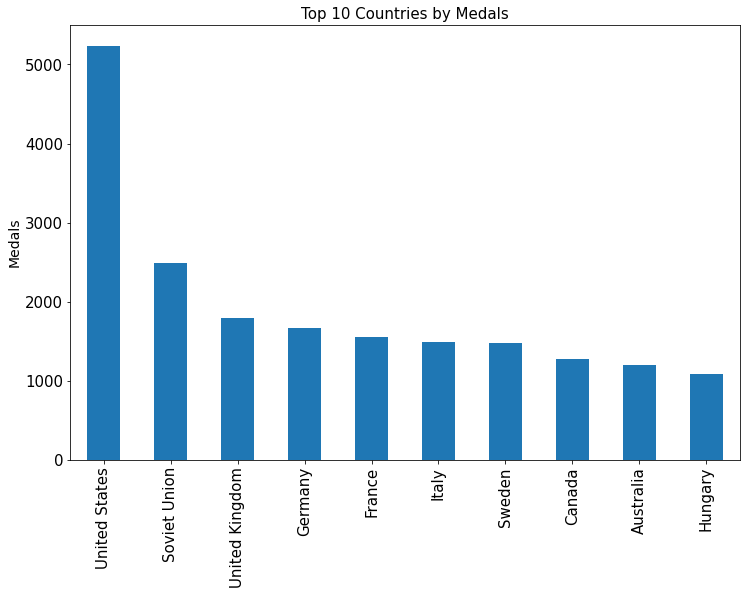

In [122]:
top_10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

In [123]:
# for count ploting, we need all rows with the top 10 countries

olympics_10 = olympics[olympics.Country.isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


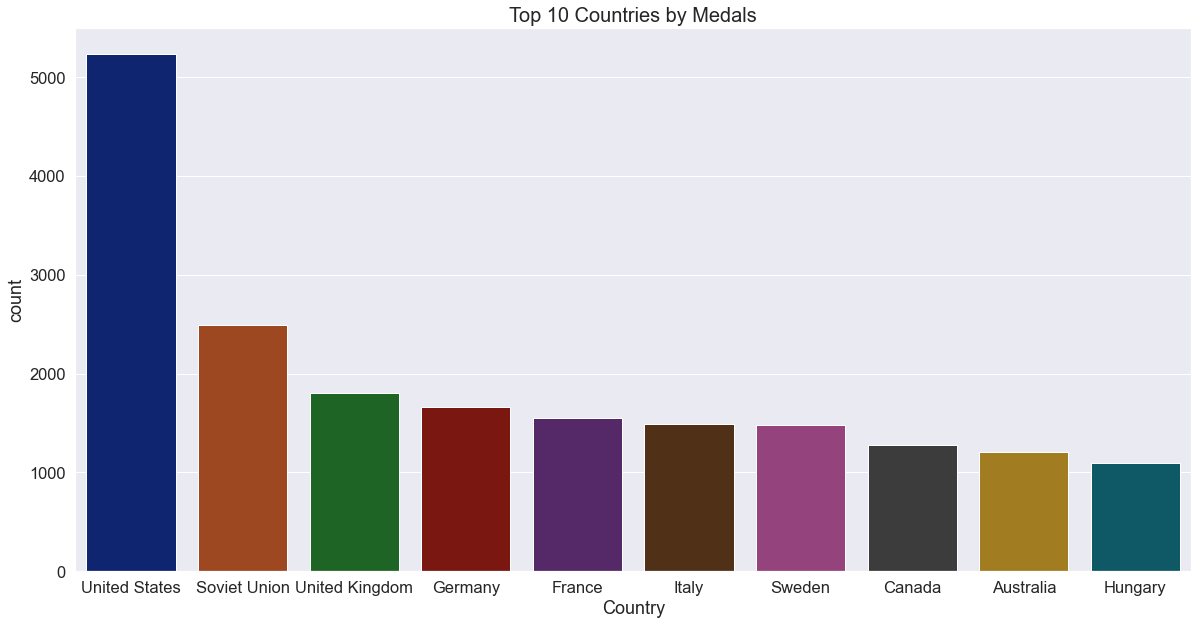

In [124]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

Splitting the total medals of Top 10 Countries into Summer / Winter Edition

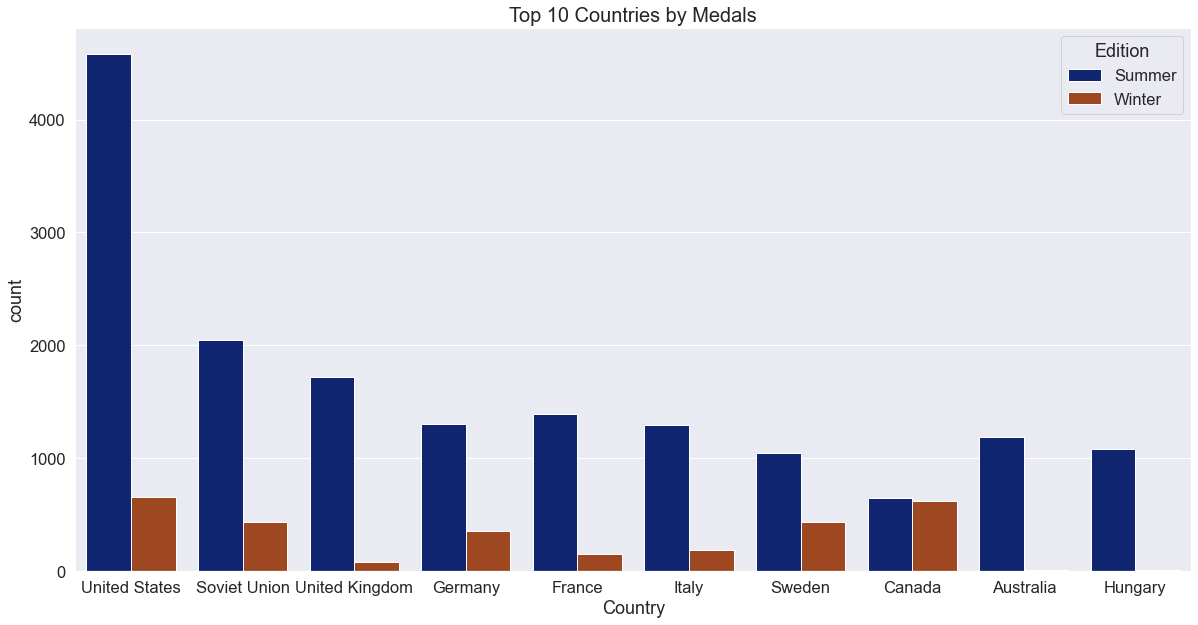

In [125]:
# country-edition count plotting
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Edition", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

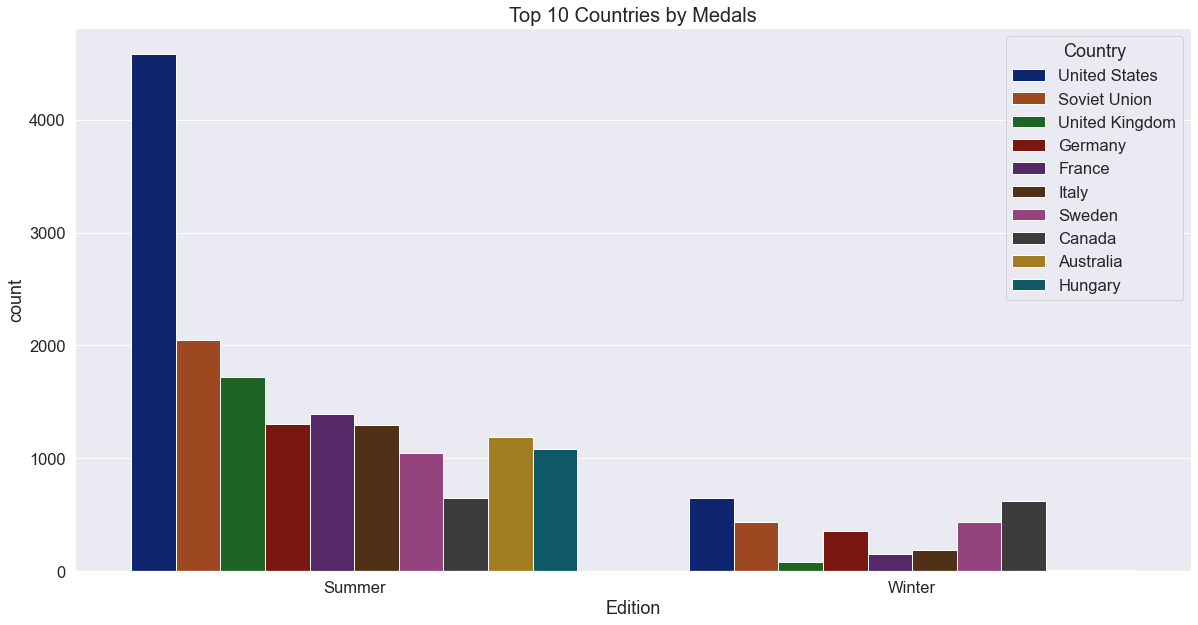

In [126]:
# vice versa: edition-country count plotting
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Edition", hue = "Country", hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

In [127]:
# vice versa plotting wasn't a good idea as it less "readable"

Split the total medals of Top 10 Countries into Gold, Silver, Bronz

In [128]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


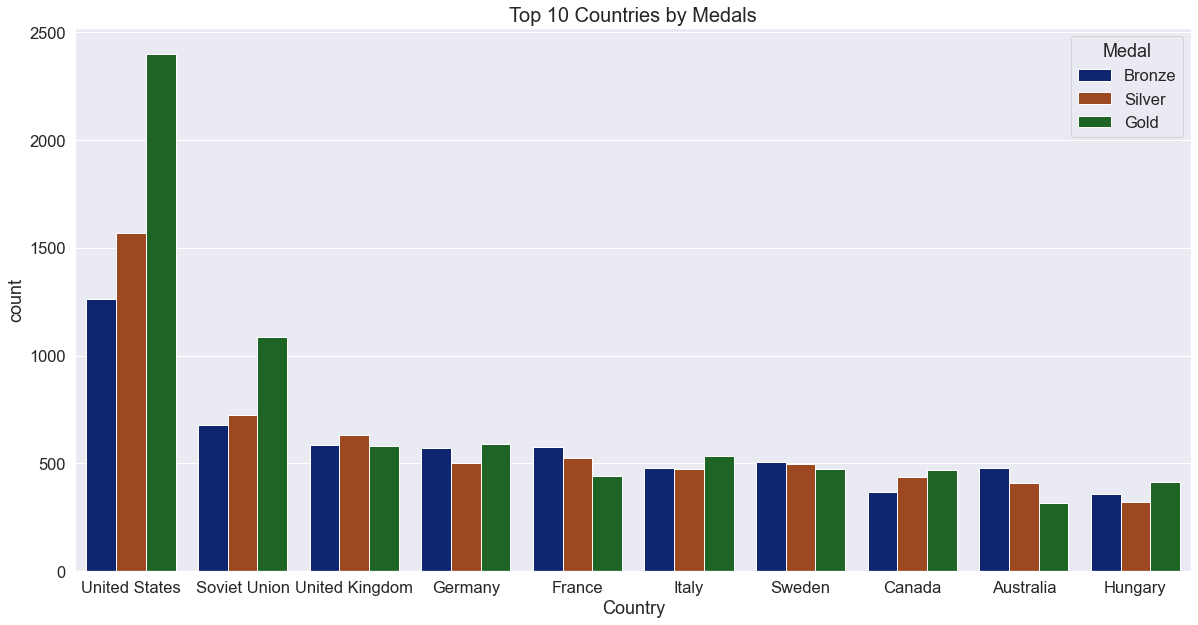

In [129]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

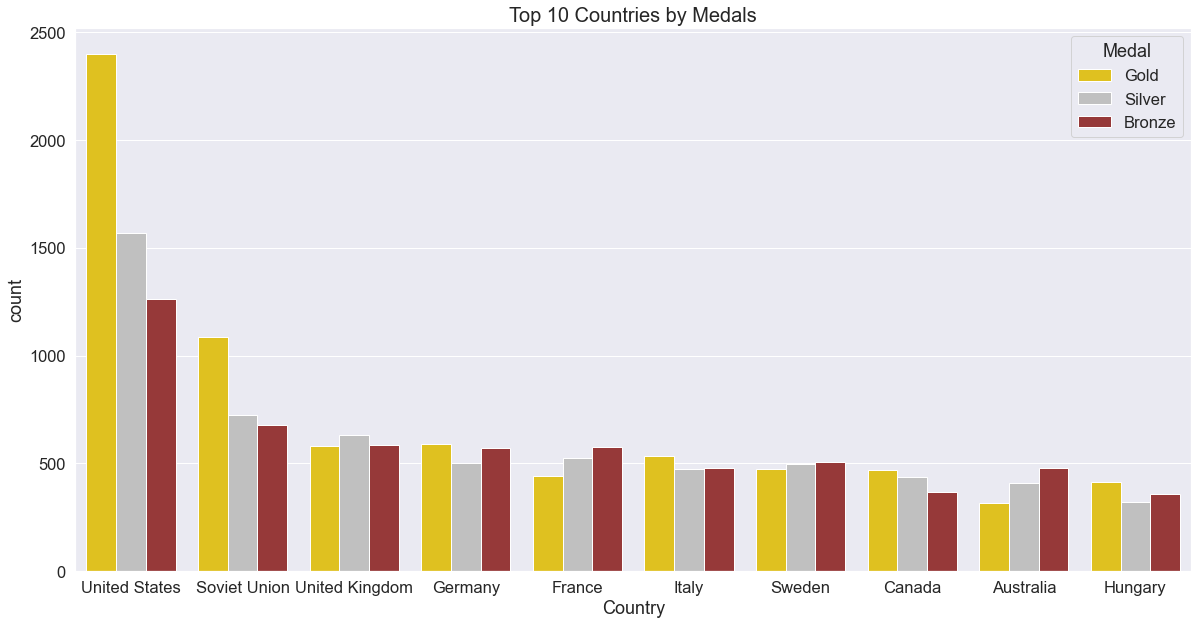

In [130]:
# improving the plot
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

## 5. Do GDP, Population, and Politics matter?

Creating a new table with countries as an index column and kinds of medals as features. Adding an additional column for the total amount of medals for each country. 

In [131]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [132]:
pd.crosstab(olympics.Country, columns=olympics.Medal, margins=True,
            margins_name="Total").sort_values("Total", ascending=False).head(20)

Medal,Bronze,Silver,Gold,Total
Country,,,,
Total,12288,12238,12405,36931
United States,1265,1571,2402,5238
Soviet Union,677,724,1088,2489
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
France,578,526,444,1548
Italy,481,473,534,1488
Sweden,505,496,476,1477
Canada,369,435,470,1274


In [133]:
med_per_c = pd.crosstab(olympics.Country, columns=olympics.Medal, margins=True,
            margins_name="Total").sort_values("Total", ascending=False)

In [134]:
med_per_c

Medal,Bronze,Silver,Gold,Total
Country,,,,
Total,12288,12238,12405,36931
United States,1265,1571,2402,5238
Soviet Union,677,724,1088,2489
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
...,...,...,...,...
Eritrea,1,0,0,1
Tonga,0,1,0,1
Togo,1,0,0,1


In [135]:
# better to drop the first row "Total"
med_per_c.drop("Total", axis = 0, inplace = True)

In [136]:
med_per_c

Medal,Bronze,Silver,Gold,Total
Country,,,,
United States,1265,1571,2402,5238
Soviet Union,677,724,1088,2489
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
France,578,526,444,1548
...,...,...,...,...
Eritrea,1,0,0,1
Tonga,0,1,0,1
Togo,1,0,0,1


In [137]:
# also it's better to rearrange the columns putting the Total after Country
med_per_c = med_per_c[["Total", "Gold", "Silver", "Bronze"]]

In [138]:
med_per_c

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
...,...,...,...,...
Eritrea,1,0,0,1
Tonga,1,0,1,0
Togo,1,0,0,1


Adding GDP and Population columns from the __dic__ to the __med_per_c__

In [139]:
dic

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [140]:
# merging 
med_per_c = med_per_c.merge(dic, how="left", left_on="Country", 
                            right_on="Country").drop(columns="Code")

In [141]:
med_per_c

,Country,Total,Gold,Silver,Bronze,Population,GDP
0,United States,5238,2402,1571,1265,321418820.0,56115.718426
1,Soviet Union,2489,1088,724,677,NaN,NaN
2,United Kingdom,1799,580,632,587,65138232.0,43875.969614
3,Germany,1665,589,504,572,81413145.0,41313.313995
4,France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...,...
140,Eritrea,1,0,0,1,NaN,NaN
141,Tonga,1,0,1,0,106170.0,4098.543929
142,Togo,1,0,0,1,7304578.0,559.635877
143,Niger,1,0,0,1,19899120.0,358.958152


In [142]:
# setting Country index
med_per_c.set_index("Country" , inplace=True)
med_per_c

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Eritrea,1,0,0,1,NaN,NaN
Tonga,1,0,1,0,106170.0,4098.543929
Togo,1,0,0,1,7304578.0,559.635877


Adding new __Total_Games__ column to __med_per_c__ for the total amount of games each country took participation

In [143]:
# first, we need to identify the way we get the total amout of olympic games.

# let's check the unique values in olympics df
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [144]:
# taking into into consideration Year or City .nunique(), value we cannot say for sure 
# what is the total amount of the olympic games,
# since some cities hosted more than 1 game and 
# there are some years when winter and summer games took place.

# so a wise way to count the total amout of olympic games would be 
# to count the amount of unique combinations years and cities

# 2 steps to be done:
# - add a new year-city column for each row
# - count the total amount of unique values in there 

In [145]:
# add a new year-city column for each row
olympics["Games"] = olympics.apply(lambda x: str(x.Year) + " " + x.City, axis = 1)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [146]:
# the total amount of olympic games
olympics.Games.nunique()

49

In [147]:
# getting the total amount of olympic games for each row
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

In [148]:
# adding to med_per_c the new column for the total amount of olympic games for each  country
med_per_c["Total_Games"] = olympics.groupby("Country").apply(lambda x: int(x.Games.nunique()))

In [149]:
med_per_c

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47
...,...,...,...,...,...,...,...
Eritrea,1,0,0,1,NaN,NaN,1
Tonga,1,0,1,0,106170.0,4098.543929,1
Togo,1,0,0,1,7304578.0,559.635877,1


## 6. Statistical Analysis and Hypothesis Testing

Checking feature correlation 

In [150]:
# rn, we dont need columns = ["Gold", "Silver", "Bronze"]
med_per_c.drop(columns = ["Gold", "Silver", "Bronze"], inplace = True)

In [151]:
# correlation:

In [152]:
med_per_c.corr(method = "pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.206606,0.437131,0.712917
Population,0.206606,1.000000,-0.089976,0.123700
GDP,0.437131,-0.089976,1.000000,0.563540
Total_Games,0.712917,0.123700,0.563540,1.000000


In [153]:
# note:
# PPC is the covariance of the two variables divided by the product of their standard deviations.
# only good for linear relationships, it's more restrictive.

In [154]:
med_per_c.corr(method = "spearman")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_Games,0.927611,0.402098,0.498056,1.000000


In [155]:
# note:
# it's not that restrictive; assesses the relationship between the rankings, not the values.

__Hypothesis testing__

In [156]:
import scipy.stats as stats

__Hypothesis 1: There is no relationship between Total Medals and Population__

In [157]:
stats.spearmanr(med_per_c.Total, med_per_c.Population,
                nan_policy = "omit")

SpearmanrResult(correlation=0.41975527887063924, pvalue=8.132240868116897e-07)

Hypothesis 1 rejected!

__Hypothesis 2: There is no relationship between Total Medals and GDP per Capita__

In [158]:
stats.spearmanr(med_per_c.Total, med_per_c.GDP,
                nan_policy = "omit")

SpearmanrResult(correlation=0.45847787983426685, pvalue=1.5758169913239602e-07)

Hypothesis 2 rejected!

__Hypothesis 3: There is no relationship between Total Medals and Participations__

In [159]:
stats.spearmanr(med_per_c.Total, 
                med_per_c.Total_Games)

SpearmanrResult(correlation=0.9276106841243015, pvalue=5.026540188200113e-63)

Hypothesis 3 accepted!

## 7. Plotting Most Successful Countries by Ranking

In [160]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [161]:
medals_by_cats = pd.concat([pd.crosstab(olympics.Country, olympics.Edition), 
                            pd.crosstab(olympics.Country, olympics.Gender)], axis = 1)
medals_by_cats

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [162]:
medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter

In [163]:
medals_by_cats.sort_values("Total", ascending = False, inplace = True)

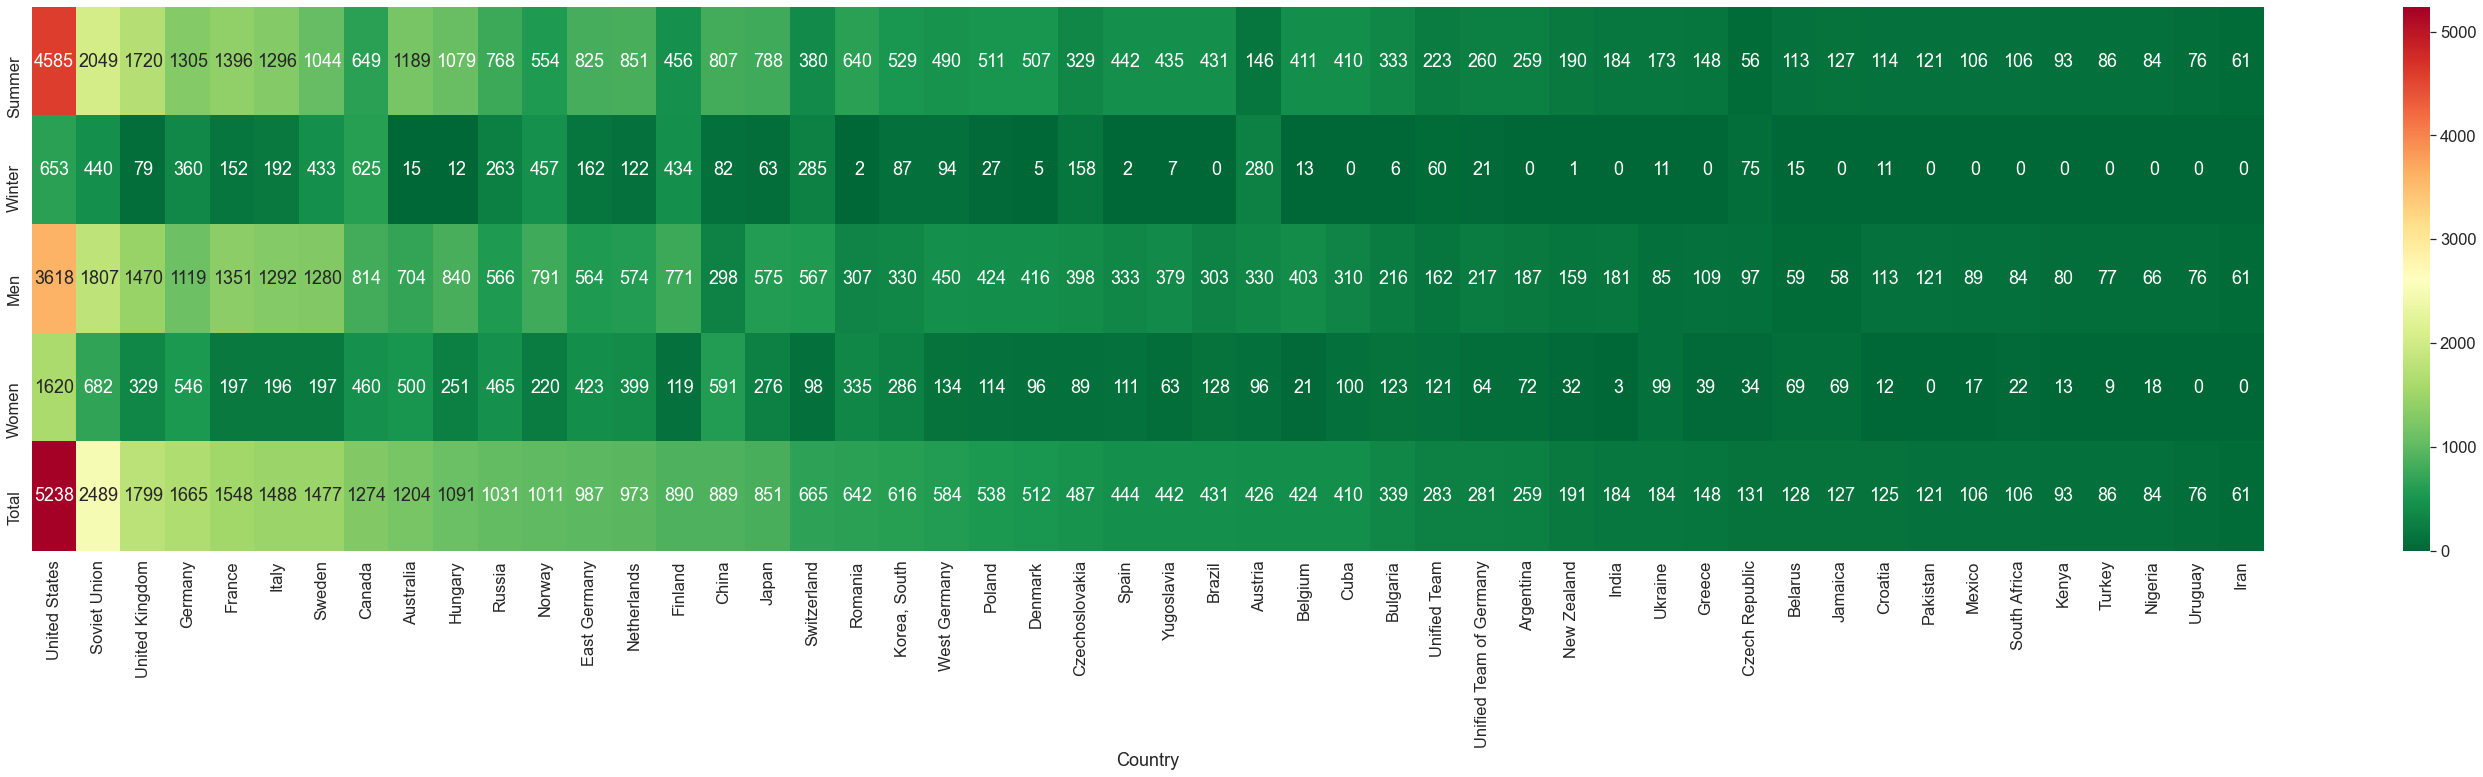

In [164]:
# we are plotting top 50 assuming that the value weight of countries with a small number of medals
# can be distorted by one or two extremely successful athletes.

# plotting with values
plt.figure(figsize = (50, 10))
sns.heatmap(medals_by_cats.head(50).T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

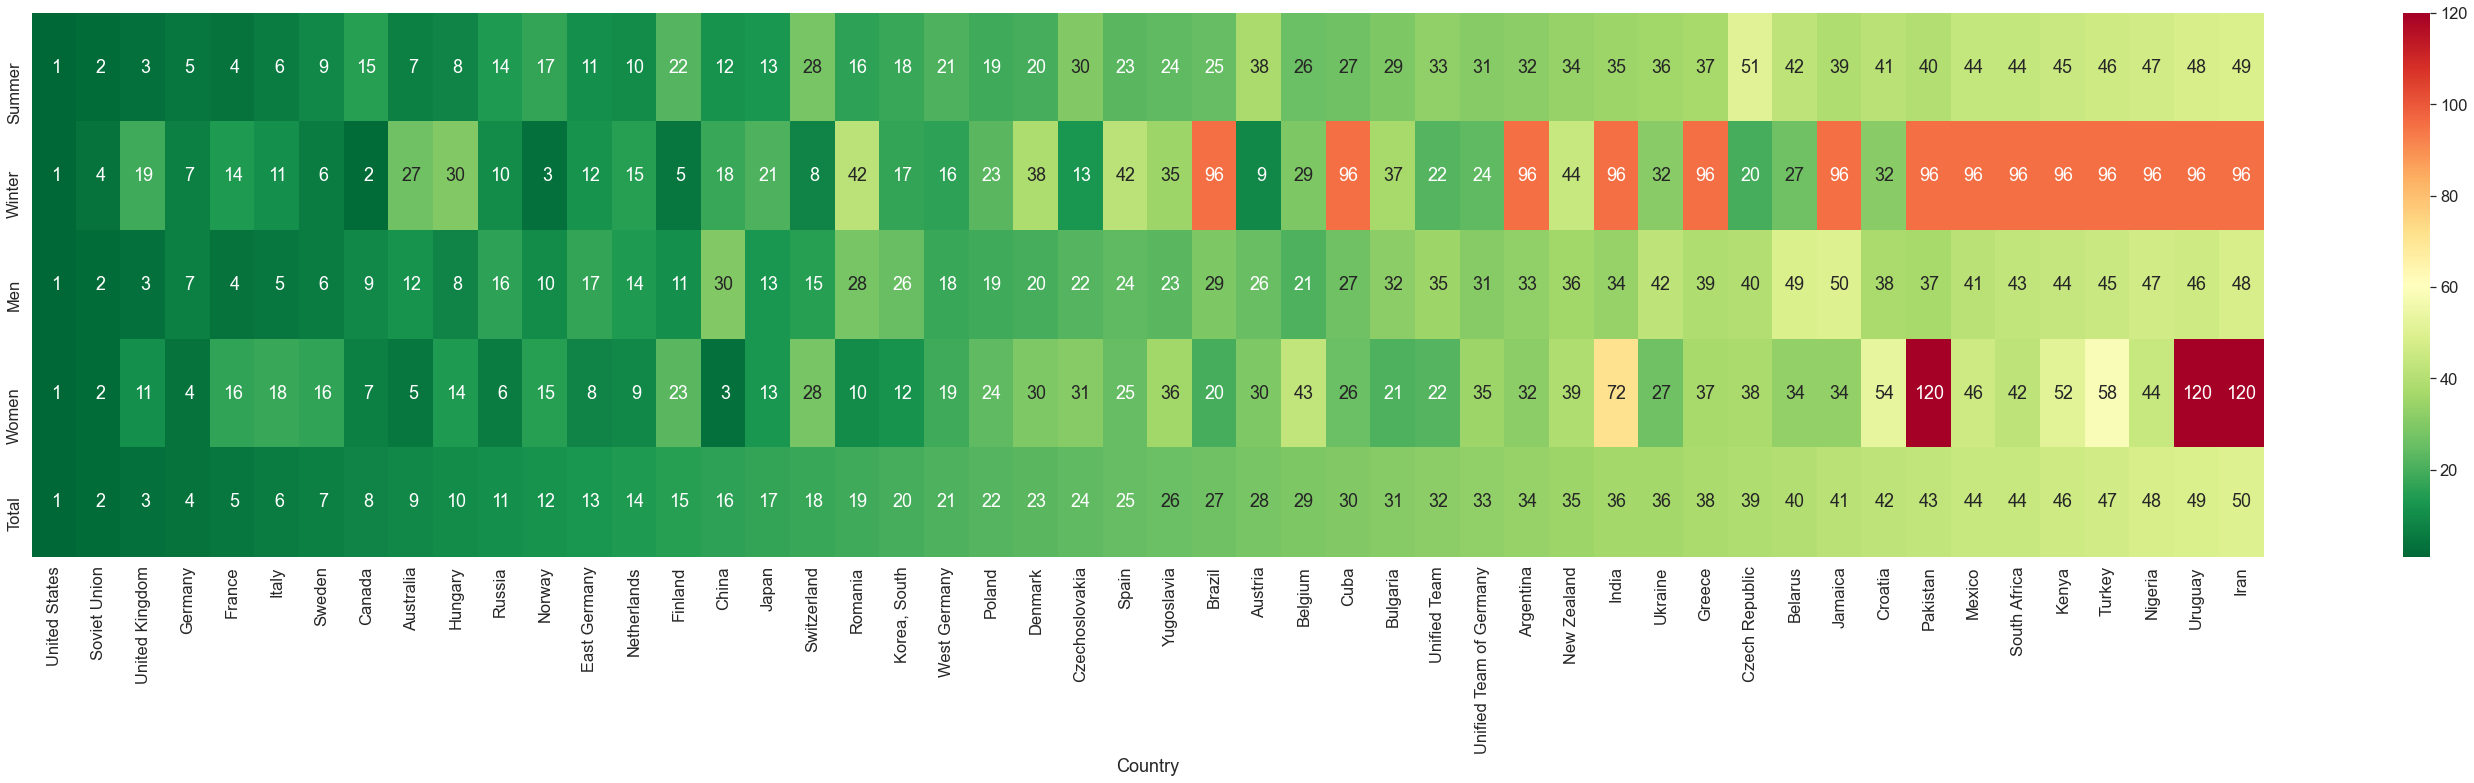

In [165]:
# when plotting with values, colors don't represent things well.
# plotting with the ranks:

ranks = medals_by_cats.rank(ascending = False, method = "average")
plt.figure(figsize = (50, 10))
sns.heatmap(ranks.head(50).T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

## 8. Summer Games vs. Winter Games - does Geographical Location matter?

Identifying Countries that are more successful in Winter Games (with heatmap)

In [166]:
top_50 = ranks.head(50)

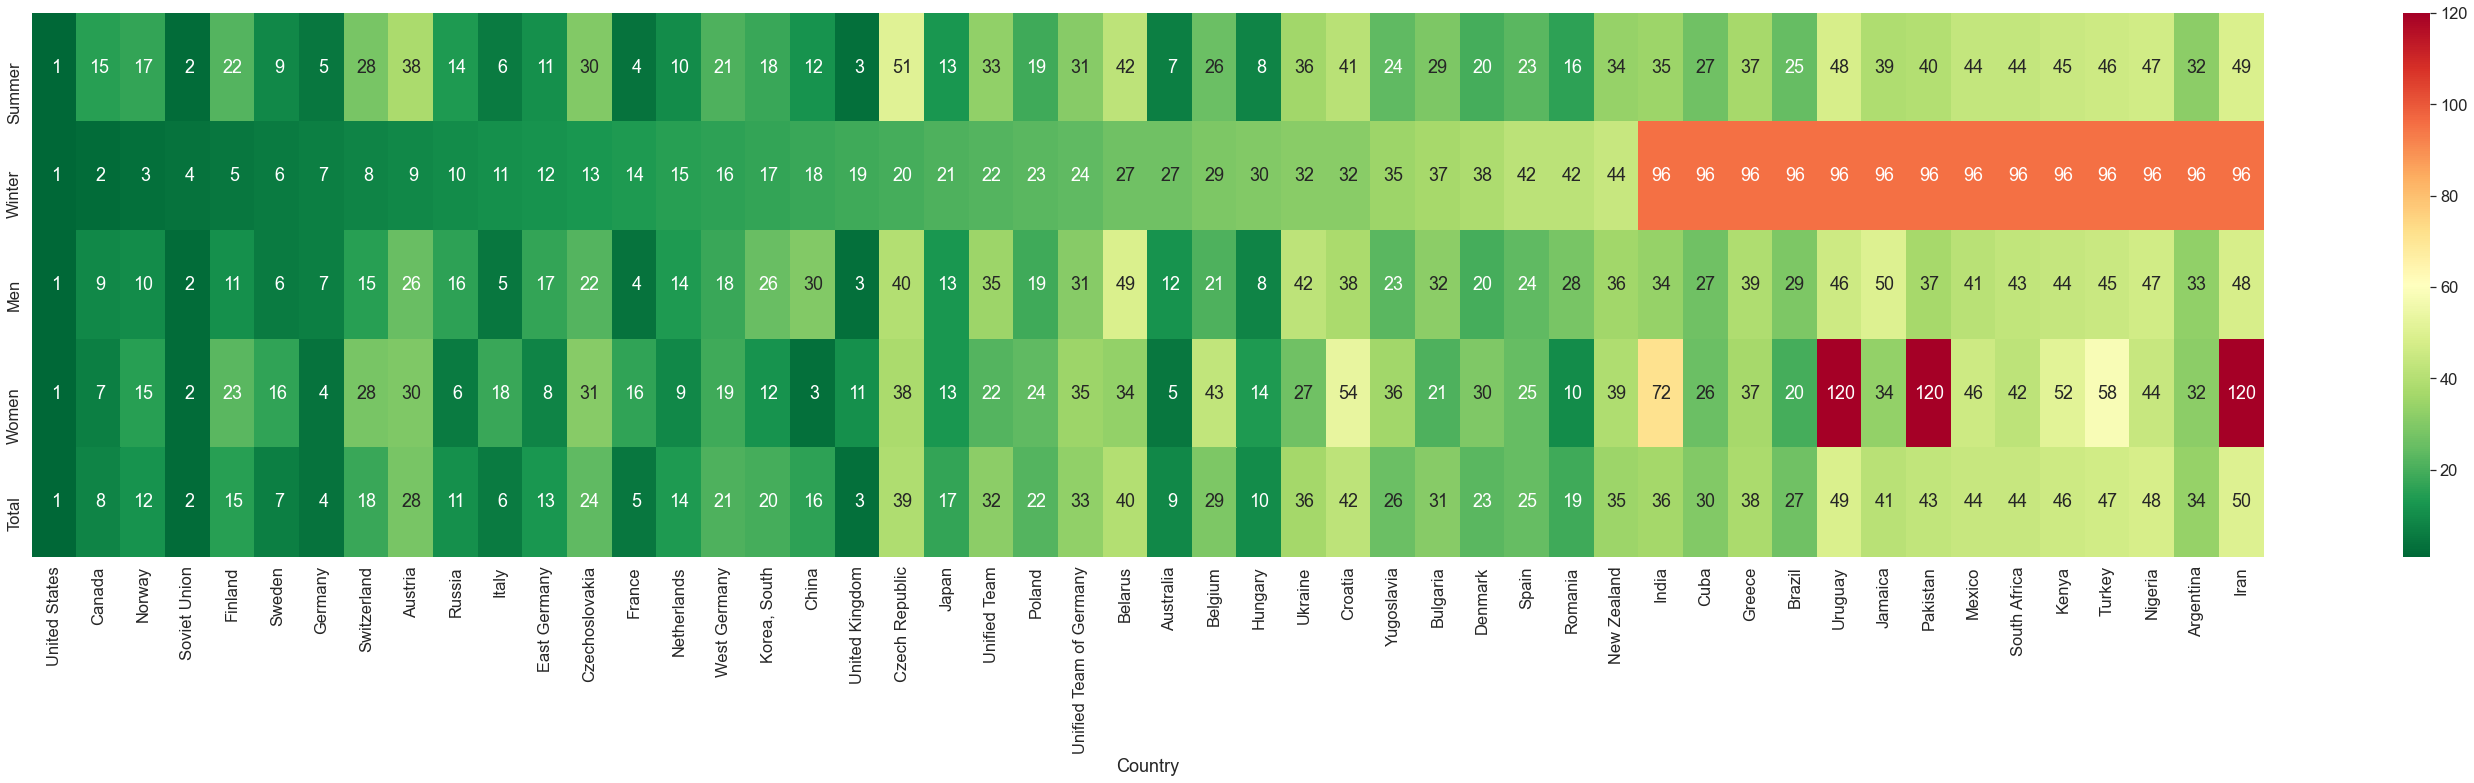

In [167]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Winter").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

Identifying Countries that are more successful in Summer Games with heatmap

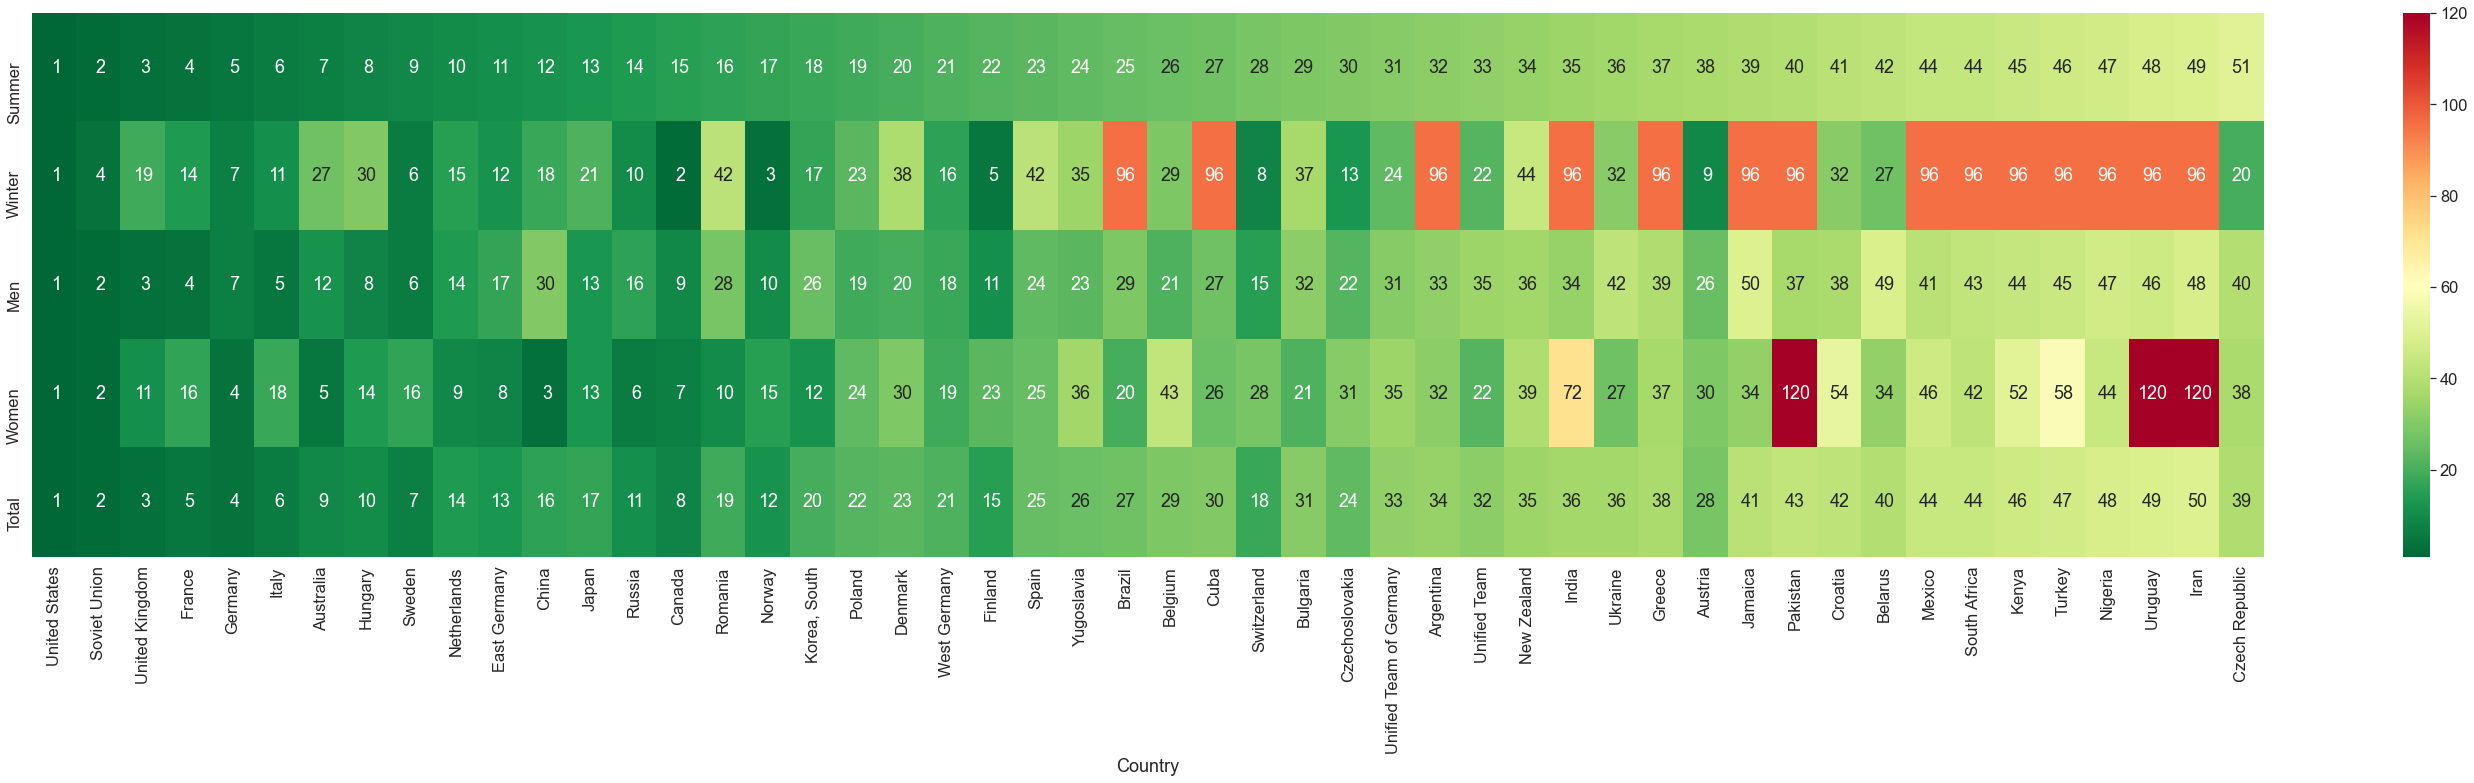

In [168]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Summer").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

Identifying Countries that are more successful in Summer Games with heatmap

In [169]:
# method: winter/summer ranking substruction.
# in the plot, the closest a country is located to 0, the more equally successful in Summer and Winter Games

# the bluer - the more successful in Winter Games over the Summer Games

In [170]:
top_50.Summer.sub(top_50.Winter).sort_values()

Country
Brazil                    -70.5
Cuba                      -68.5
Argentina                 -63.5
India                     -60.5
Greece                    -58.5
Jamaica                   -56.5
Pakistan                  -55.5
South Africa              -52.0
Mexico                    -52.0
Kenya                     -50.5
Turkey                    -49.5
Nigeria                   -48.5
Uruguay                   -47.5
Iran                      -46.5
Romania                   -25.5
Hungary                   -22.0
Australia                 -20.0
Denmark                   -18.5
Spain                     -18.5
United Kingdom            -16.0
Yugoslavia                -11.0
New Zealand               -10.5
France                    -10.0
Japan                      -8.0
Bulgaria                   -8.0
China                      -6.0
Netherlands                -5.0
Italy                      -5.0
Poland                     -4.0
Belgium                    -3.0
Soviet Union               -2.0


In [171]:
rank_diff = top_50.Summer.sub(top_50.Winter).sort_values().to_frame()
rank_diff

,0
Country,
Brazil,-70.5
Cuba,-68.5
Argentina,-63.5
India,-60.5
Greece,-58.5
Jamaica,-56.5
Pakistan,-55.5
South Africa,-52.0
Mexico,-52.0


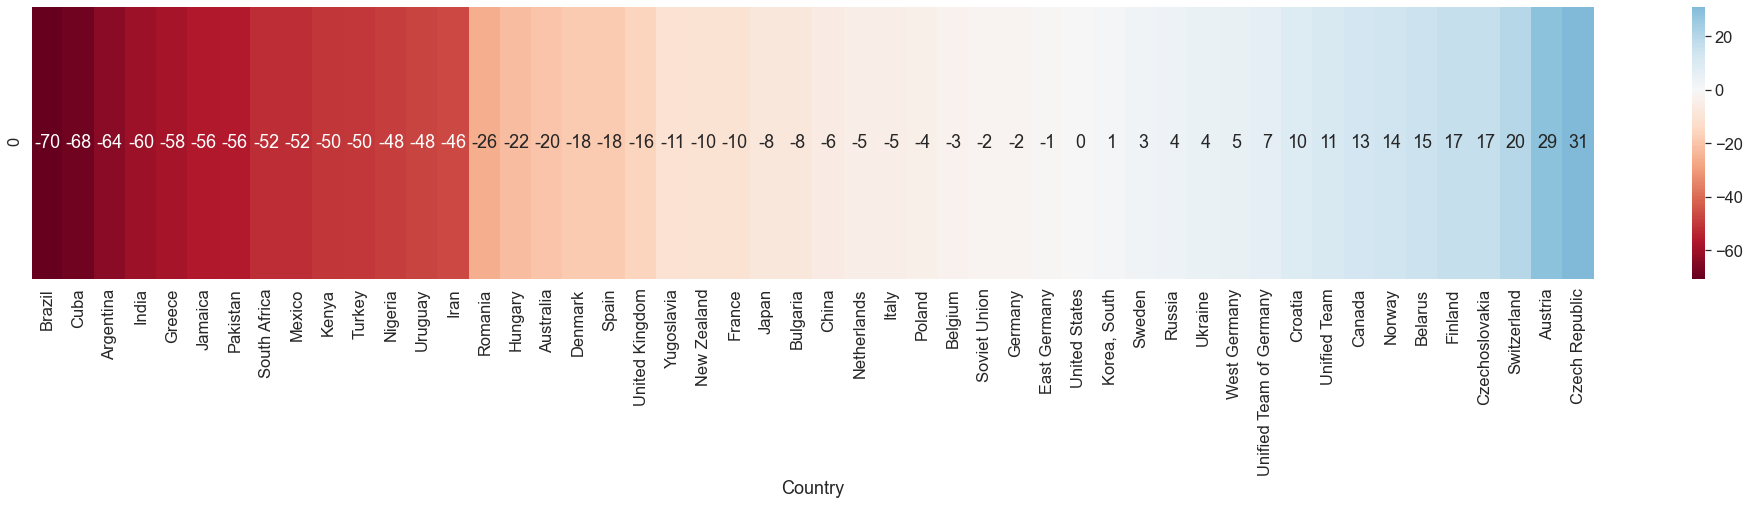

In [172]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff.T,cmap='RdBu',annot=True,fmt='2.0f', center = 0)
plt.show()

In [173]:
# geographical location DOES matter! 

## 9. Men vs. Women

In [174]:
# same procedure as for geographical location analysis

Identifying Countries where men are more successful

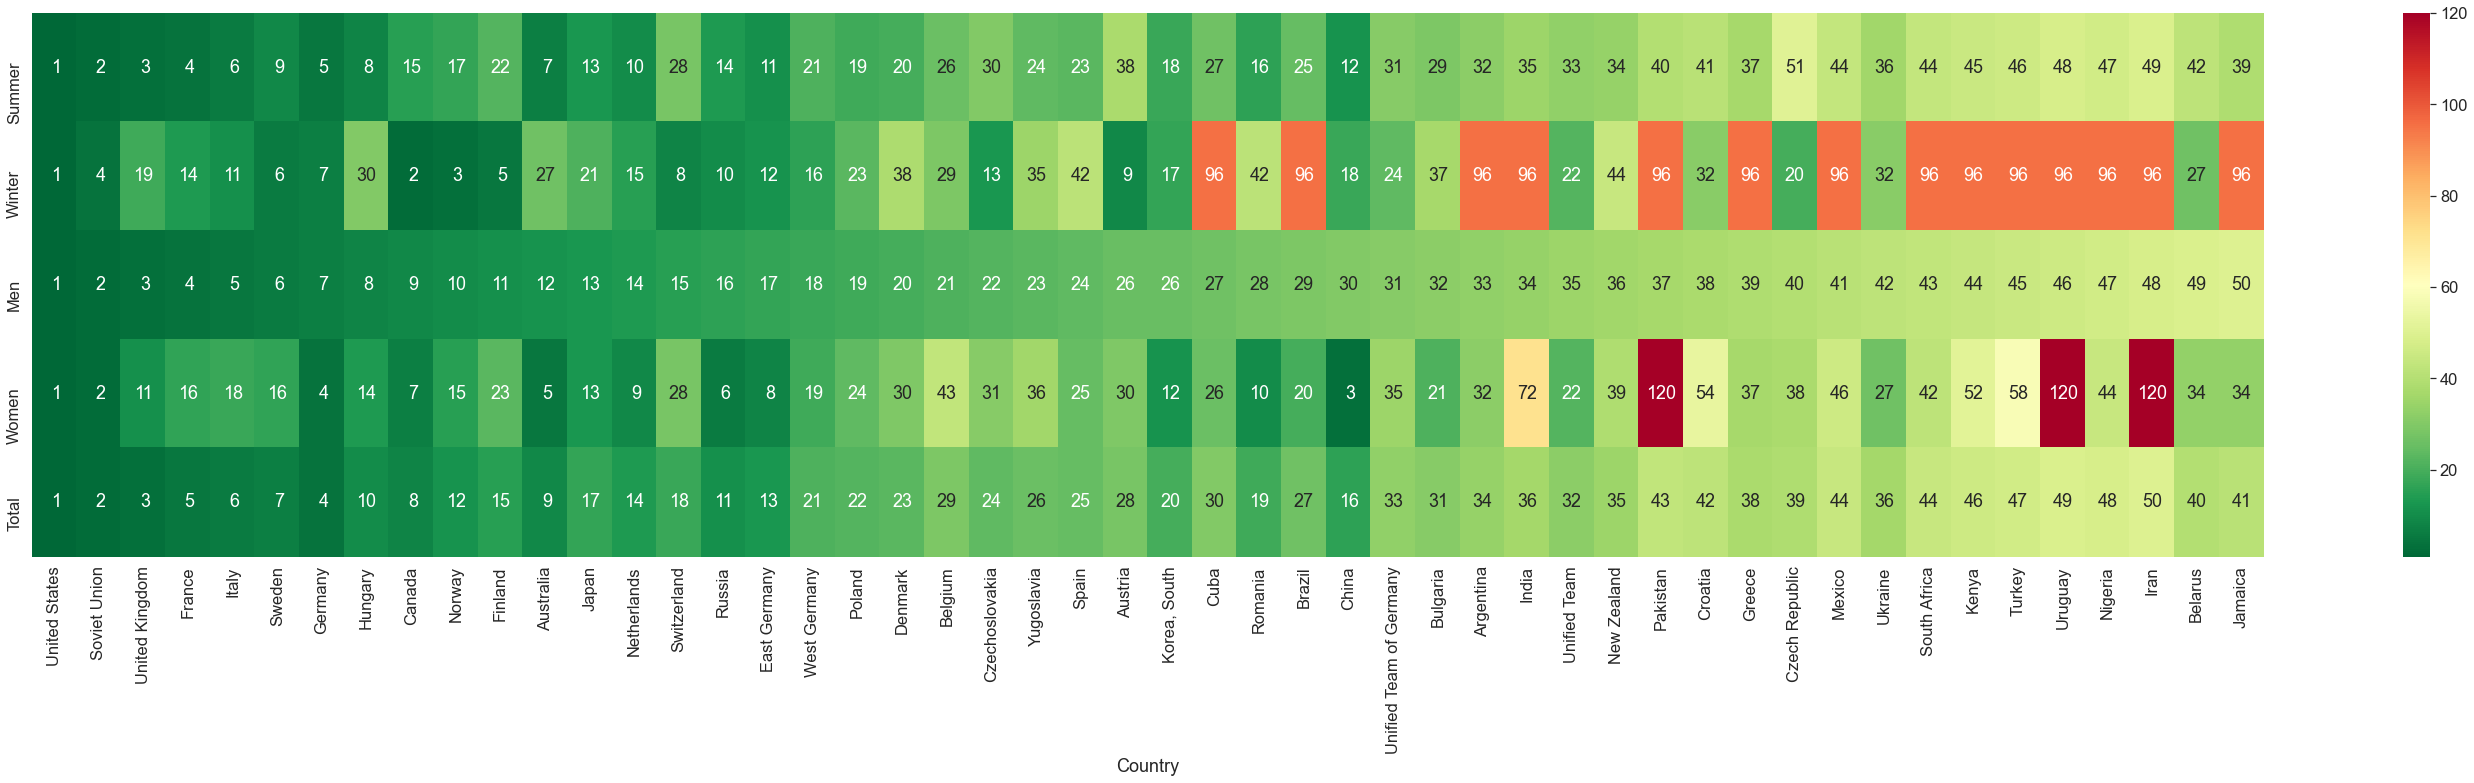

In [175]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Men").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

Identifying Countries where women are more successful

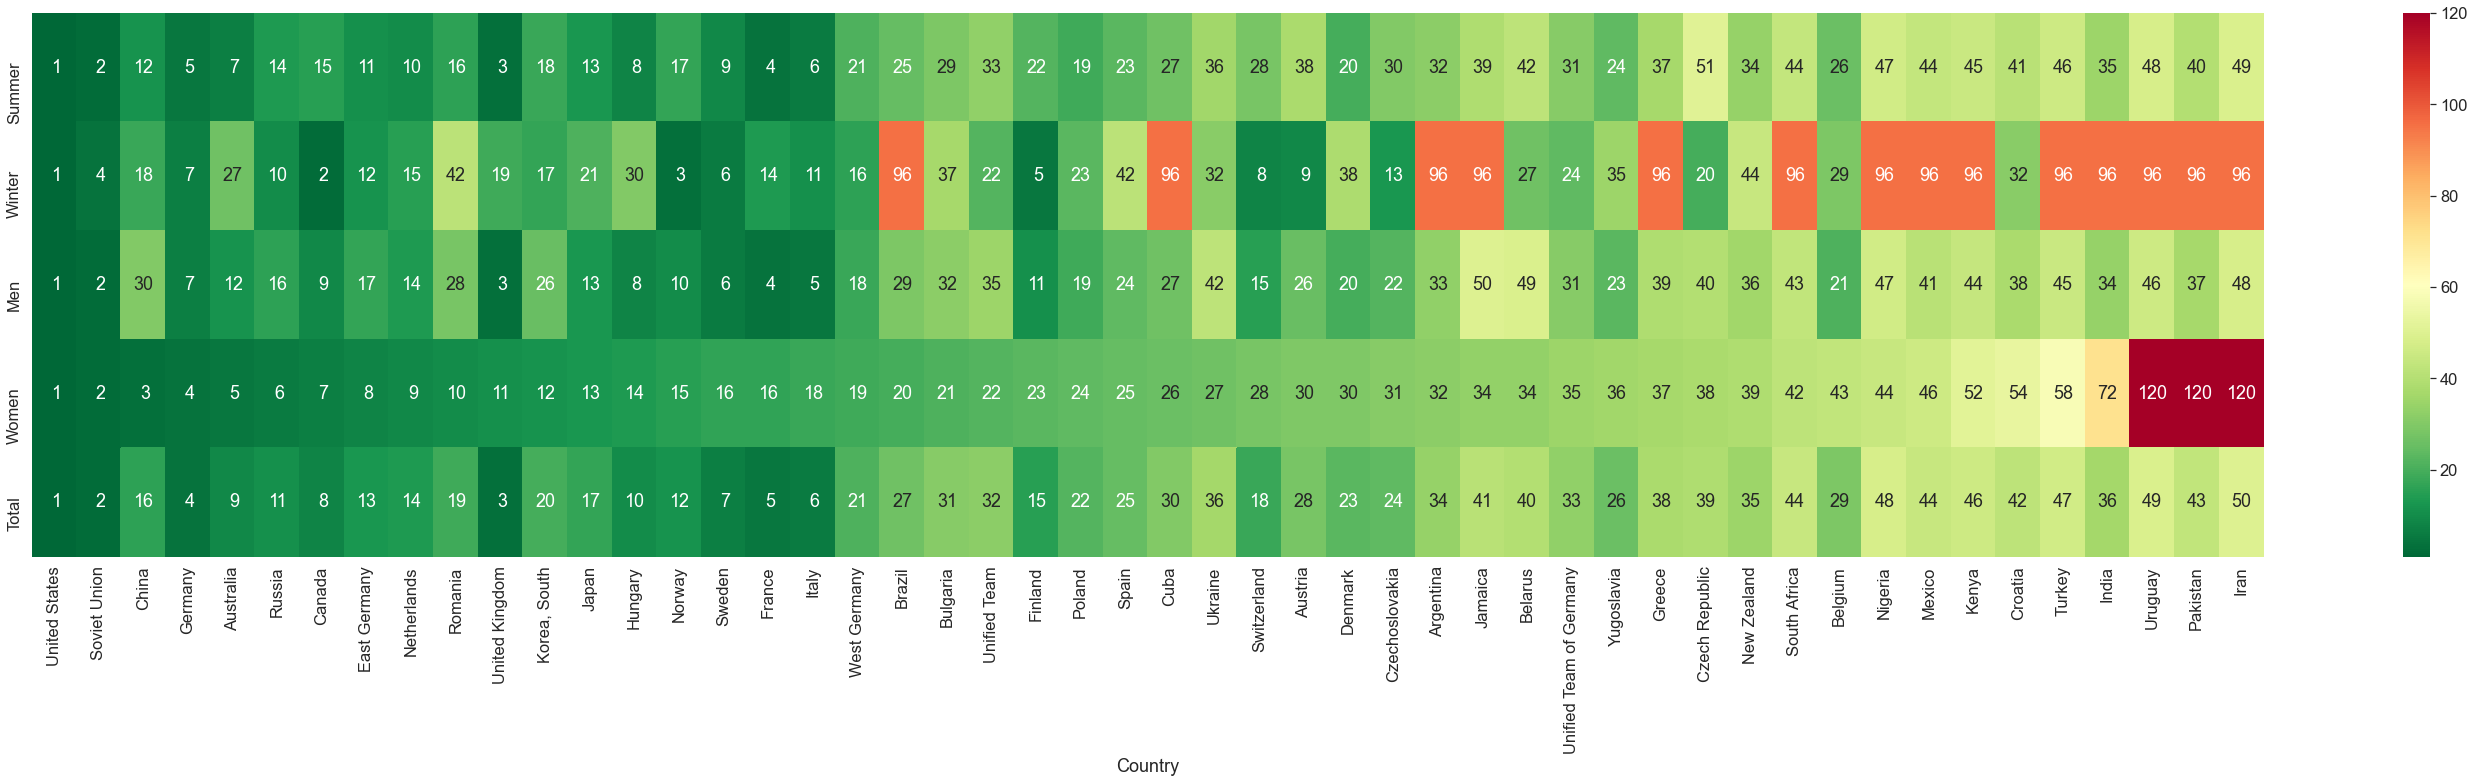

In [176]:
plt.figure(figsize = (50, 10))
sns.heatmap(top_50.sort_values(by = "Women").T,cmap='RdYlGn_r',annot=True,fmt='2.0f')
plt.show()

Identifying Countries men and women are equally successful

In [177]:
rank_diff2 = top_50.Men.sub(top_50.Women).sort_values().to_frame()
rank_diff2

,0
Country,
Pakistan,-83.0
Uruguay,-74.0
Iran,-72.0
India,-37.5
Belgium,-22.0
Croatia,-15.5
Turkey,-13.5
Yugoslavia,-13.0
Italy,-13.0


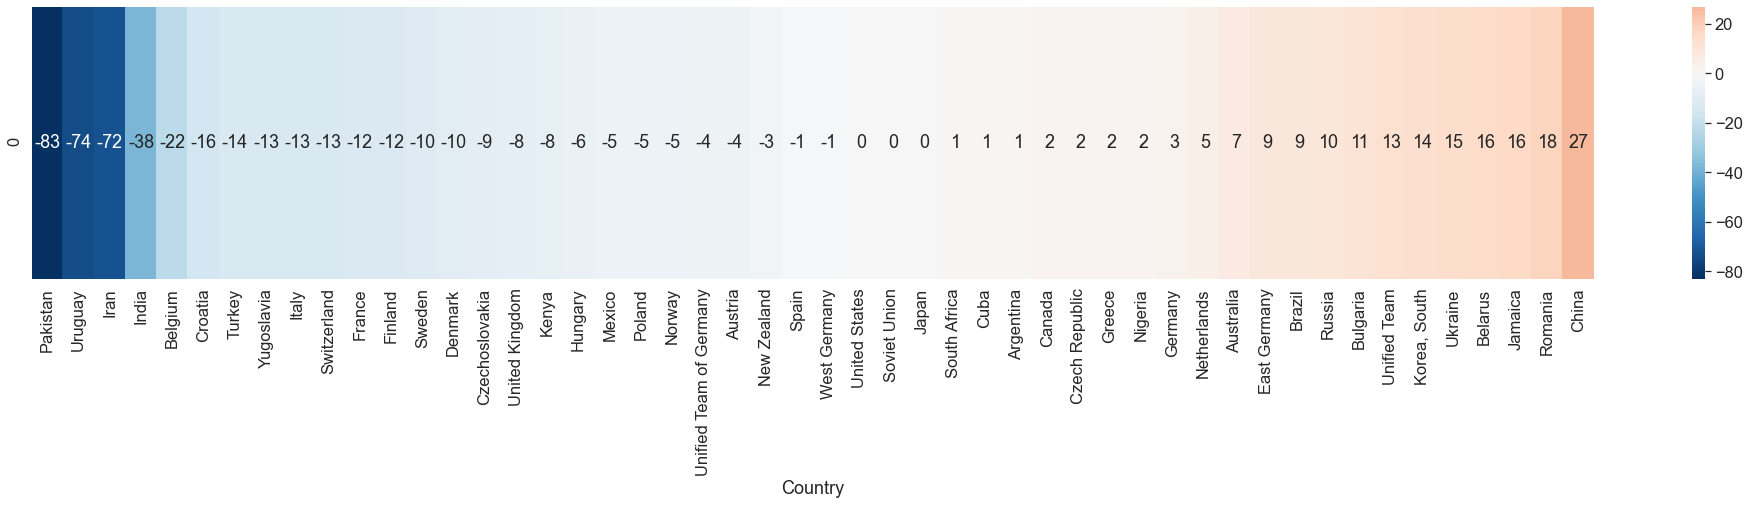

In [178]:
plt.figure(figsize = (35, 5))
sns.heatmap(rank_diff2.T,cmap='RdBu_r',annot=True,fmt='2.0f', center = 0)
plt.show()

## 10. "Traditional" Sports for Most Successful Countries

Finding what sports are "traditional" for a specific country

In [179]:
olympics.Sport.value_counts()

Aquatics             4170
Athletics            3637
Rowing               2667
Gymnastics           2307
Skiing               1781
Fencing              1613
Ice Hockey           1563
Football             1497
Hockey               1422
Skating              1256
Wrestling            1211
Shooting             1150
Sailing              1109
Cycling              1105
Basketball           1012
Canoe / Kayak        1002
Volleyball            994
Handball              973
Equestrian            939
Boxing                894
Weightlifting         591
Judo                  491
Bobsleigh             452
Biathlon              420
Baseball              335
Archery               329
Tennis                296
Rugby                 192
Modern Pentathlon     180
Luge                  180
Softball              180
Curling               172
Table Tennis          144
Badminton             144
Taekwondo             112
Tug of War             94
Canoe                  81
Polo                   66
Lacrosse    

In [180]:
sports = olympics.Sport.value_counts().index
sports

Index(['Aquatics', 'Athletics', 'Rowing', 'Gymnastics', 'Skiing', 'Fencing',
       'Ice Hockey', 'Football', 'Hockey', 'Skating', 'Wrestling', 'Shooting',
       'Sailing', 'Cycling', 'Basketball', 'Canoe / Kayak', 'Volleyball',
       'Handball', 'Equestrian', 'Boxing', 'Weightlifting', 'Judo',
       'Bobsleigh', 'Biathlon', 'Baseball', 'Archery', 'Tennis', 'Rugby',
       'Modern Pentathlon', 'Luge', 'Softball', 'Curling', 'Table Tennis',
       'Badminton', 'Taekwondo', 'Tug of War', 'Canoe', 'Polo', 'Lacrosse',
       'Golf', 'Triathlon', 'Cricket', 'Rackets', 'Croquet',
       'Water Motorsports', 'Basque Pelota', 'Roque', 'Jeu de paume'],
      dtype='object')

In [181]:
olympics.Country.value_counts().head(20)

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Russia            1031
Norway            1011
East Germany       987
Netherlands        973
Finland            890
China              889
Japan              851
Switzerland        665
Romania            642
Korea, South       616
Name: Country, dtype: int64

In [182]:
top_20 = olympics.Country.value_counts().head(20).index
top_20

Index(['United States', 'Soviet Union', 'United Kingdom', 'Germany', 'France',
       'Italy', 'Sweden', 'Canada', 'Australia', 'Hungary', 'Russia', 'Norway',
       'East Germany', 'Netherlands', 'Finland', 'China', 'Japan',
       'Switzerland', 'Romania', 'Korea, South'],
      dtype='object')

In [183]:
by_sport = pd.crosstab(olympics.Country, olympics.Sport)
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Algeria,0,0,7,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
Argentina,3,0,5,0,0,24,0,0,0,24,...,0,0,1,6,0,0,12,0,2,0
Armenia,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,6
Australasia,11,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,62,0,67,0,0,0,0,14,22,6,...,0,0,0,3,0,0,0,0,7,9
West Indies Federation,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yugoslavia,91,0,2,0,0,96,0,0,0,11,...,0,4,0,0,0,0,24,0,0,16


In [184]:
by_sport = by_sport.rank(ascending = False, method = "average")
by_sport

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,19.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Algeria,101.0,84.0,47.0,78.0,76.0,83.0,74.0,84.5,80.5,35.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Argentina,41.0,84.0,53.5,78.0,76.0,11.5,74.0,84.5,80.5,9.0,...,75.0,79.0,28.0,12.0,79.0,76.5,17.0,74.0,45.5,103.0
Armenia,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,35.5,40.0
Australasia,30.5,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,31.0,79.0,76.5,86.0,74.0,103.5,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Germany,18.0,84.0,16.0,78.0,76.0,83.0,74.0,9.0,6.5,35.0,...,75.0,79.0,89.5,21.0,79.0,76.5,86.0,74.0,28.5,32.0
West Indies Federation,101.0,84.0,53.5,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Yugoslavia,16.0,84.0,70.0,78.0,76.0,3.0,74.0,84.5,80.5,25.5,...,75.0,5.5,89.5,90.5,79.0,76.5,12.0,74.0,103.5,20.0


In [185]:
by_sport = by_sport.loc[top_20, sports]

In [186]:
by_sport

,Aquatics,Athletics,Rowing,Gymnastics,Skiing,Fencing,Ice Hockey,Football,Hockey,Skating,...,Lacrosse,Golf,Triathlon,Cricket,Rackets,Croquet,Water Motorsports,Basque Pelota,Roque,Jeu de paume
United States,1.0,1.0,1.0,2.0,8.0,7.0,2.0,1.0,12.0,1.0,...,3.0,1.0,9.5,74.0,73.5,73.5,74.0,74.0,1.0,2.0
Soviet Union,4.0,3.0,7.0,1.0,5.0,4.0,5.0,3.0,11.0,4.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
United Kingdom,10.5,2.0,2.0,19.0,34.5,15.0,10.0,20.0,5.0,16.0,...,2.0,2.0,5.0,1.5,1.0,73.5,1.0,74.0,73.5,1.0
Germany,5.0,7.0,5.0,16.0,6.0,6.0,13.0,7.5,4.0,9.0,...,74.5,74.5,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
France,14.0,8.0,11.0,17.0,10.0,2.0,79.5,23.0,83.0,17.0,...,74.5,74.5,79.0,1.5,73.5,1.0,2.0,1.5,73.5,74.0
Italy,12.0,14.0,8.0,8.5,9.0,1.0,79.5,7.5,83.0,11.5,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Sweden,15.0,9.0,30.0,5.0,4.0,12.0,3.0,13.5,83.0,15.0,...,74.5,74.5,9.5,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Canada,13.0,12.5,3.0,30.5,12.0,90.0,1.0,22.0,83.0,2.0,...,1.0,3.0,5.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Australia,2.0,12.5,9.0,37.0,21.5,90.0,79.5,90.5,2.0,24.0,...,74.5,74.5,1.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0
Hungary,3.0,18.5,32.0,7.0,91.5,3.0,79.5,4.0,83.0,20.0,...,74.5,74.5,79.0,74.0,73.5,73.5,74.0,74.0,73.5,74.0


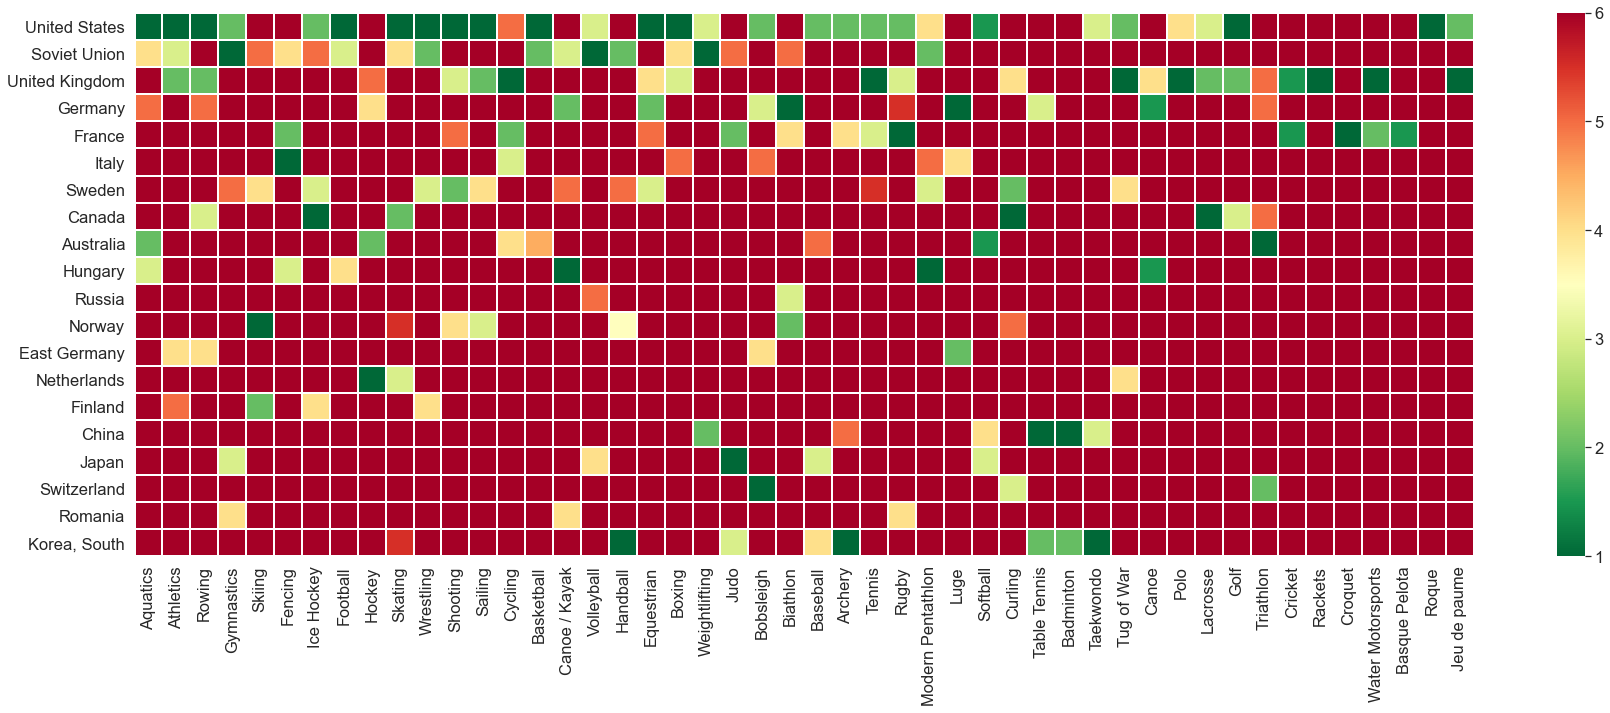

In [187]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_sport,cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.show()